# RF Regression - Boston Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = pd.Series(boston_data.target)
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

### Train Test Split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  
..       ...     ...    ...  
320     19.6  396.90   7.20  
15      21.0  395.62   8.47  
484     20.2  370.73  13.34  
125     19.1  385.02  14.81  
265     13.0  392.40  10.45  

[404 rows x 13 columns]

## Model Training

In [5]:
rf_reg = RandomForestRegressor(random_state=10)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

## Model Evaluation

In [6]:
# testing accuracy
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_test, y_pred)
print("R2 Score :", r2_value)

MSE : 14.633860225490183
**************************************************
RMSE : 3.8254228819164795
**************************************************
MAE : 2.687480392156862
**************************************************
R2 Score : 0.8600711774652099


In [7]:
# Training accuracy
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_value)

MSE : 1.485990542079208
**************************************************
RMSE : 1.2190121172815338
**************************************************
MAE : 0.8136460396039592
**************************************************
R2 Score : 0.9806916041199254


In [9]:
rf_reg.estimators_[1]

DecisionTreeRegressor(max_features=1.0, random_state=1283169405)

In [10]:
plt.figure(figsize=(200, 150))
plot_tree(rf_reg.estimators_[1], feature_names=x.columns, filled=True, rounded=True, precision=2)
print()
plt.savefig("Random Forest Regressor.png")

### Decision Tree Model

In [11]:
dt_reg = DecisionTreeRegressor(random_state=10)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

## Model Evaluation

In [12]:
# testing accuracy
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_test, y_pred)
print("R2 Score :", r2_value)

MSE : 28.581568627450977
**************************************************
RMSE : 5.346173269493889
**************************************************
MAE : 3.1960784313725483
**************************************************
R2 Score : 0.7267033316834521


In [13]:
# Training accuracy
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_value)

MSE : 0.0
**************************************************
RMSE : 0.0
**************************************************
MAE : 0.0
**************************************************
R2 Score : 1.0


# Hyperparameter Tunning

In [15]:
import time
t1 = time.time()

rf_model = RandomForestRegressor(random_state=10, n_jobs=-1)

# n_estimators=100,
# criterion='squared_error',
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# max_features=['sqrt', 'log2'],
# n_jobs=-1,


hyperparameter = {"n_estimators" : np.arange(10,200),
                 "criterion":['squared_error', 'absolute_error'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15), 
                 "max_features": ['sqrt', 'log2']
                 } 

gscv_rf_reg = RandomizedSearchCV(rf_model, hyperparameter, cv=5)
gscv_rf_reg.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 10.88920783996582 sec


In [16]:
gscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=6,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=115, n_jobs=-1,
                      random_state=10)

In [18]:
rf_reg = gscv_rf_reg.best_estimator_
rf_reg.fit(x_train, y_train)

# Testing Accuracy
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_test, y_pred)
print("R2 Score :", r2_value)

MSE : 22.50740823603545
**************************************************
RMSE : 4.744197322628502
**************************************************
MAE : 3.2063512361466335
**************************************************
R2 Score : 0.7847843915242272


In [19]:
# Training Accuracy
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*50)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)
print("*"*50)

r2_value = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_value)

MSE : 6.890619231597071
**************************************************
RMSE : 2.624998901256355
**************************************************
MAE : 1.805978260869566
**************************************************
R2 Score : 0.9104659146777802


### Feature Selection Techniques

In [ ]:
1. Filter Method
2. Wrapper Method
3. Embedded Method --> DT feature importance method

In [20]:
array = rf_reg.feature_importances_
array

array([0.08344196, 0.02006922, 0.05463594, 0.00391506, 0.07721704,
       0.21495069, 0.05959479, 0.07844021, 0.01049146, 0.04094248,
       0.06327693, 0.03474667, 0.25827755])

<AxesSubplot: >

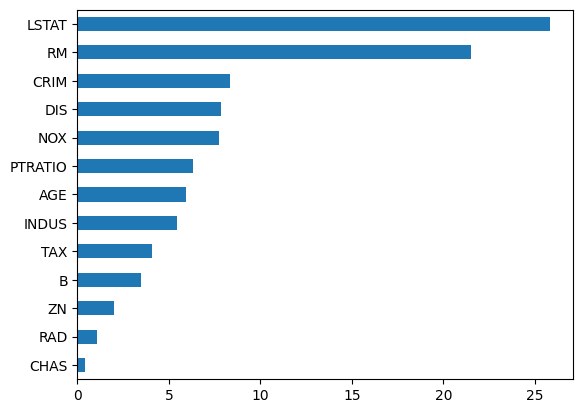

In [21]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")